<a href="https://colab.research.google.com/github/fred576/first/blob/main/KSP5_Solved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **KSP 5.0 Selection Assignment**





In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Section 1: Calculating the Redshift of Galaxies

You are given the data for all the galaxies in the cluster in the file 'galaxy.csv'.

This includes the name of the galaxy, observed wavelength of the $H\alpha$ line $\lambda_{H\alpha}$, Right Ascension at J2000.0 and Declination and J2000.0 (You can read more about RA and Dec [here](https://en.wikipedia.org/wiki/Equatorial_coordinate_system))

In [18]:
galaxy_data = pd.read_csv('galaxy.csv')


Since the galaxies would have some radial velocities with respect to us, the wavelengths we observed would be [redshifted](https://en.wikipedia.org/wiki/Redshift) due to doppler effect.

Using the value of the Observed Wavelength of $H\alpha$ line (Rest Wavelength $\lambda_{H\alpha0} = 6562.8nm)$, calculate the redshift of the galaxies in our cluster.

Use this to find their radial velocities of the galaxies and plot it.

(Assume that the observed wavelength has been correscted for the motion of earth around sun, and motion of sun around the center of Milky Way. Put more simply, these are the wavelengths you would have observed if you were at rest at the center of Milky Way)

In [19]:
# your code here
h0 = 6562.8
c = 299792.458
galaxy_data['velocity'] = c * (galaxy_data['Observed Wavelength of H-alpha'] - h0) / h0

Using the data from galaxy.csv, answer the following questions.

For your convenience, the RA and Dec data has been converted from the format $a^\circ b^m c^s$ to $xx^\circ$ below


In [20]:
temp = galaxy_data['RA J2000.0'].str.split(' ', expand=True)
galaxy_data['RA J2000.0'] = temp[0].astype(float) + temp[1].astype(float) / 60 + temp[2].astype(float) / 3600
temp = galaxy_data['Dec J2000.0'].str.split(' ', expand=True)
galaxy_data['Dec J2000.0'] = temp[0].astype(float) + temp[1].astype(float) / 60 + temp[2].astype(float) / 3600

***

###Q1.1. What is the approximate angular size of the galaxy cluster?

Ans) From the Scatter Plot, the approximate radius of the cluster is $8 ^ \circ$


***

###Q1.2. Can you comment anything about the rotation of the galaxies around the center of the cluster.
HINT: You may find it useful to plot a scatter plot of RA and DEC with radial velocity as colormap.

Ans) We see that the velocities are in general higher at a higher Declination and lower at a lower declination. This seems to suggest that the galaxies are rotating about the cluster center, going into the plane towards the north and coming out of the plane towards the south.

***

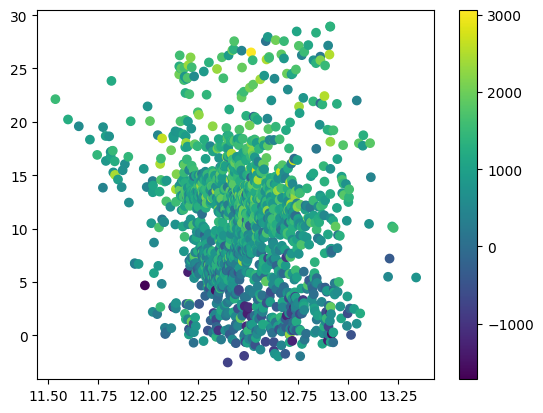

In [23]:
# your code here
plt.scatter(galaxy_data['RA J2000.0'], galaxy_data['Dec J2000.0'], c=galaxy_data['velocity'], cmap='viridis')
plt.colorbar()

#Section 2: Calibrating Cepheids Data

NOTE: Although there are no prerequisities for this section, it relies a bit on knowledge about cepheids and their Period-Luminosity Relation. Necessary resource links have been provided wherever needed. You are strongly encouraged to use the internet to aid as a reference whenever needed.
***

The [Gaia Mission](https://en.wikipedia.org/wiki/Gaia_(spacecraft) aims at cataloging and create a precise three-dimensional map of astronomical objects throughout the Mily Way. It maps the motion of the stars, which encode the origin and subsequent evolution of the Milky Way. The spectrophotometric measurements provide detailed physical properties of all stars observed, characterizing their luminosity, effective temperature, gravity and elemental composition.





In [22]:
gaia_data = pd.read_csv('gaia.csv')

Cepheids are a particular type of variable stars that pulsates radially, varying in both diameter and temperature. They **changes in brightness**, with a **well-defined stable period and amplitude**.

The file 'gaia.csv' includes data for about 5000 Cepheid Variable Stars in our own galaxy. In particular, the file contains the following data fields:
   
*   Unique ID of the Source Star
*   Parallax (in milli arcseconds) : You can read more about parallax [here](https://en.wikipedia.org/wiki/Stellar_parallax)
*   Mean **Apparent** Magnitude ($m$)
*   TIme period of Pulsations P(in days)



Classical Cepheids follow the [Period Luminosity Law](https://en.wikipedia.org/wiki/Period-luminosity_relation#The_relations), also commonly known as the Leavitt Law.

It basically states that there is an empirical relation between the pulsation period $(P)$ of a Cepheid Star and it's **Absolute Magnitude** ($M$) of the form -

#### $\begin{equation}M = \alpha \log_{10}(P \text{(in days)}) + \beta \end{equation}$
***

### Your aim is to verify Leavitt Law for cepheids using the given data, and find the values of $\alpha$ and $\beta$.

You may find it helpful to use the function 'poly_fit' in numpy for this.

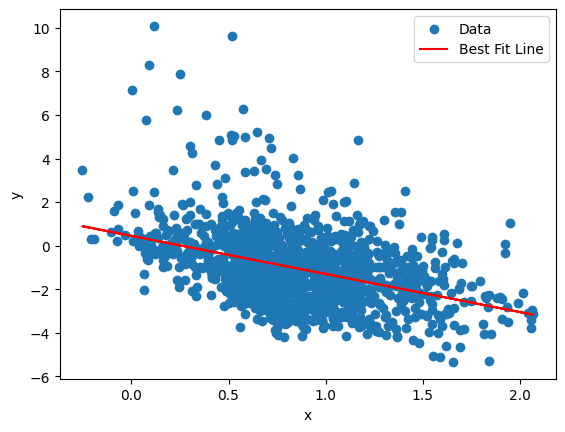

M = -1.75 log_10(P) + 0.45


In [26]:
# your code here
distance = 1000/gaia_data['parallax']
gaia_data['absolute_mag'] = gaia_data['mean apparent magnitude'] - 5 * np.log10(distance) + 5
gaia_data = gaia_data[gaia_data['parallax'] > 0.1]
# Get the scatter plot of M and log_10(P) and the best fit line

# Assuming x and y are the data points for the plot
x = np.log10(gaia_data['time period'])
y = np.array(gaia_data['absolute_mag'])

# Perform polynomial regression of degree 1
coefficients = np.polyfit(x, y, 1)

# Generate the best-fit line
best_fit_line = np.polyval(coefficients, x)

# Plot the data points and the best-fit line
plt.scatter(x, y, label='Data')
plt.plot(x, best_fit_line, color='red', label='Best Fit Line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

slope = coefficients[0]
intercept = coefficients[1]
print("M = {:.2f} log_10(P) + {:.2f}".format(slope, intercept))


# Get the values of alpha and beta

***
### Some useful information about the Magnitude system

The brightness of a star as seen by some observer is dependent on the observer's distance from the star as well as the intrinsic brightness of the star (ignoring any absorption in the intervening space).

In astronomy, brightness of a star, as seen by some observer, is measured in terms of its **apparent magnitude ($m$)**. For two stars (1 and 2) with fluxes $f_1$ and $f_2$ respectively, their apparent magnitudes $m_1$ and $m_2$ are related by:

$m_1 - m_2 = 2.5 \log_{10} \left( \frac{f_1}{f_2} \right)$

**Absolute magnitude ($M$)** of any star is its apparent magnitude if the star was exactly 10 parsecs away from the observer. Thus, $M$ only depends on the intrinsic brightness of the star.

***


# Section 3: Getting the distances to our galaxies

Now that we have our period-luminosity relation, we can observe cepheids in the galaxies in our cluster and use this to get the distances to our galaxies. (Yes, this is possible! Hubble Telescope actually observed Cepheids in the galaxies in Virgo Cluster)


For this, you have been given the data file 'cepheid.csv' which contains the following data fields:
*   Unique ID of the Cepheid
*   Name of the Galaxy to which it belongs
*   Mean Apparent Magnitude (m)
*   Time Period of Pulsation (in days)

In [27]:
# your code here
cepheid_data = pd.read_csv('cepheid.csv')

In [29]:
cepheid_data['Absolute Magnitude'] = slope * np.log10(cepheid_data['Period']) + intercept   # Period-Luminosity relation
cepheid_data['distance'] = 10 ** ((cepheid_data['Apparent Magnitude'] - cepheid_data['Absolute Magnitude'] + 5) / 5)  # Distance modulus
cepheid_data['distance'] /= 10**6

In [31]:
d = []
for galaxy in galaxy_data['Name']:
    temp = cepheid_data[cepheid_data['Galaxy_ID'] == galaxy]
    if len(temp) == 0:
        d.append(np.nan)
        continue
    #print(galaxy, temp['distance'].mean())
    temp = temp[temp['distance'] > 10]
    d.append(temp['distance'].mean())
galaxy_data['distance'] = d

Use the Period-Luminosity Law derived in Section-2 and the above data to find an estimate for the distance to each galaxy in the cluster.

Make sure to handle outliers in the above data. The data may contain some cepheids that actually DO NOT belong to the given galaxy, but it just seems to us that this is the case since they fall along the same line of sight.
***

# Section 4: Getting the Hubble's Constant

The famous [Hubble's Law](https://en.wikipedia.org/wiki/Hubble%27s_law) is the observation that galaxies are moving away from Earth at speeds proportional to their distance.

$v = H_0 d$

where $H_0$ is the proportionalaity constant, also known as the Hubble's Constant.

Now that we have an estimate for the radial velocities and distance to the galaxies in our cluster, find an estimate of the Hubble Constant (H).


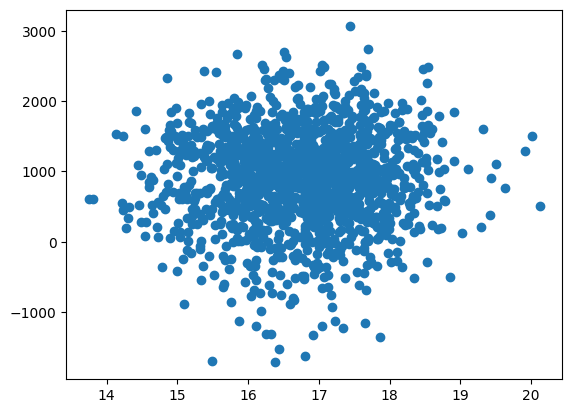

In [38]:
# your code here
plt.scatter(galaxy_data['distance'], galaxy_data['velocity'])

In [39]:
# your code here
Hubble = galaxy_data['velocity'] / galaxy_data['distance']
print(f"Estimate of H: {galaxy_data['velocity'].median()/galaxy_data['distance'].median()}")

print(f"Another Estimate of H is {Hubble.mean()}")


Estimate of H: 54.805406005625514
Another Estimate of H is 53.47279682207062


***

#### Q4.1 Compare the value of $H$ that you got from the standard $H_0$ commonly accepted today. The estimate that you got - is it the same (within error margins), higher or lower than the value of $H_0$.

The value of H we got is lower compared to standard accepted value of $H_0$, which is around 70km/s /MPc.
***

#### Q4.2 What might be the reason behind this difference in values

This is because the cluster is relatively close to us and is part of our local group only, so we are gravitationally attracted towards it.


***

# Section 5 : Dark Matter

Dark matter is a component of the universe whose presence is discerned from its gravitational attraction rather than its luminosity.

***

####Q5.0 What is the Radius of the Galaxy cluster in MPc?

Around 3 MPc. Can be estimated using either of
* Angular Distance (16 MPc * $\frac{8 \pi}{180}$)
* Scatter from Cepheids Data

***

#### Q5.1 ESTIMATE the total mass of the Galaxy Cluster. This includes mass due to visible matter as well as dark matter.

HINT: The [Virial Theorem](https://phys.libretexts.org/Bookshelves/Classical_Mechanics/Variational_Principles_in_Classical_Mechanics_(Cline)/02%3A_Review_of_Newtonian_Mechanics/2.11%3A_Virial_Theorem) provides a general equation that relates the average over time of the total kinetic energy of a stable system of discrete particles, bound by a conservative force
 $$ \left<KE\right> = -\frac{1}{2} \left<PE\right> $$

Ans) Let the total mass of the cluster be M and it's radius be R.

$$\left< KE \right> = \frac{1}{2} M \left< v ^2\right> $$
$$ \left< PE \right> \approx \frac{3}{5} \frac{GM^2}{R}$$

Also, since we have data for velocity in only one direction (say z), assuming spherical symmetry we get that $$\left< v^2\right> = \left< v_x^2\right> + \left< v_y^2\right> + \left< v_z^2\right>$$
$$\left< v^2\right> \approx 3 \left< v_{radial}^2\right>$$

Combining all these, we get that
$$M \approx \frac{5 R \left< v_{radial}^2 \right> }{G}$$


In [41]:
# your code here
R = 2.5 * 10**6 * 3.086 * 10 ** 16
G = 6.67 * 10 ** (-11)
M_odot = 1.989 * 10 ** 30

v_variance = np.var(galaxy_data['velocity'])
v_variance = v_variance * 10 ** 6
M_total = 5 * R * v_variance/ (G * M_odot)
print(f"Total mass of the cluster is around {M_total / 10**15} x 10 ^15 M_sun")

Total mass of the cluster is around 1.367855794522611 x 10 ^15 M_sun



***

#### Q5.2 ESTIMATE the visible mass in the galaxy cluster.

This is sortof vague right now.

In [43]:
M_milkyway = 1.2 * 10 ** 12
M_visible = 750 * M_milkyway
print(f"Total mass of the cluster is around {M_visible / 10**15} x 10 ^15 M_sun")

Total mass of the cluster is around 0.9 x 10 ^15 M_sun


***

#### Q5.3 What is the fraction of the total mass of the galaxy cluster that is actually in the form of Dark Matter

\< Your answer here \>

***

In [44]:
frac = 1 - M_visible/M_total
print(f"The fraction of dark matter is around {frac}")

The fraction of dark matter is around 0.3420359049514391
